# Table of Contents
#### Data Science Workflow
An introduction and summary of the approach I took to complete this project
#### Business Case and Business Value  
Background  
Goal  
Why is this important?  
#### Obtaining The Data
Sourcing the data  
Importing the CSVs  
Importing packages  
#### Scrubbing The Data
DataCleaning.ipynb  
#### Exploring The Data
Use basic plots to visually examine relationships within the dataset  
Exploration and familiarization with the dataset through statistical analysis  
Detecting potential skews  
Investigating features  
#### Modeling The Data
Train and test split the data  
Model the data with a few classifiers and review results          
Tune hyperparameters to find the ideal parameters for best performing models  
Pickle final model
#### Interpreting The Data
Compare the models created and weigh the pros & cons    
#### Conclusion
Conclusion and opinion on my ideal model    
Potential future work  
References  

## Data Science Workflow
##### For this project I am going to use the OSEMiN process
##### (Obtain, Scrub, Explore, Model, Interpret) 

- **Obtain** - The team and SPI data came from FiveThirtyEight's Soccer Predictions dataset, found [here](https://projects.fivethirtyeight.com/soccer-predictions/).
- **Scrub** - The objective here is to identify errors, potential missing or corrupted fields in the data, and to clean up the dataset by discarding, replacing, or filling missing values and errors. 
- **Explore** - This is the EDA phase. The goal here is to understand patterns within our dataset by visualizing and testing to examine relationships in the data. 
- **Model** - This step encompases the higher level pre-processing such as normalization and managing class imbalance. After that we're ready to train some models to be able to give us some accurate predictive power to make intelligent business decisions. There are multiple steps of evaluation and refining of the models to ensure they're as accurate and unbiased as possible. 
- **Interpret** - In the final step, we examine our findings developed by our modeling and indentify important insights. As more data becomes available, this cycle can repeat and continue in a loop to build a faster, less biased, and more accurate model.
 
Below you can follow the different stages of the EDA and modeling process by scrolling to the respective title.

## Business Case
#### Background
Soccer is the most watched and bet-on sport in the world. With over 3 billion global fans and viewers, it dwarfs 2nd place Cricket by over 1 billion fans. The sports betting industry is worth an estimated $3 trillion, with soccer making up the largest share of that for a single sport. 
My goal is to predict the winner of a soccer match, using different features such as, Soccer Power Index (SPI), past performances and odds. With how many people bet on the sport daily, this could amount to be a popular and useful too to help gamblers get an edge on the house, and therefore reap higher returns on their bets. 

#### Overall Goal:  
My goal is to predict the winner of a soccer match, using different features such as, Soccer Power Index (SPI), past performances and odds. With how many people bet on the sport daily, this could amount to be a popular and useful too to help gamblers get an edge on the house, and therefore reap higher returns on their bets. 


## Business Value  
### Why is this important?
The global sports gambling market is a multi-trillion-dollar industry, with much of that having to do with European club soccer. My target audience is the over 3 billion people who consider themselves soccer fans, and specifically the subset of that who intend to gamble their hard-earned money on it. I aim to assist these people in educating their decision-making to be able to maximize returns and profits on the bets that are placed. 


# Obtain the Data  
I'm using SPI data and match data from FiveThirtyEight to model. I've preprocessed the data a bit in the notebook titled DataCleaning.ipynb. In this stage, I'll import the dataset and all the neccesary libraries for the whole process.   

In [1]:
# import necessary tools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
import plotly.express as px
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')

import itertools
import math
import time
import pickle

import statsmodels.formula.api as smf
import xgboost as xgb
from xgboost import XGBClassifier
from scipy import stats
from sklearn import svm
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, \
    roc_curve, auc, mean_squared_error, roc_auc_score, recall_score, precision_score, \
    plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.pipeline import Pipeline

rng = np.random.RandomState(25)

import warnings
warnings.filterwarnings('ignore')

In [2]:
club_data = pd.read_csv('Data/SPI_data.csv')
club_data.head()

Unnamed: 0  rank  prev_rank                 name                    league  \
0           0     1          1        Bayern Munich         German Bundesliga   
1           1     2          2      Manchester City   Barclays Premier League   
2           2     3          3            Barcelona  Spanish Primera Division   
3           3     4          4            Liverpool   Barclays Premier League   
4           4     5          5  Paris Saint-Germain            French Ligue 1   

    off   def    spi  
0  3.51  0.43  93.96  
1  2.86  0.24  92.84  
2  3.01  0.50  90.16  
3  2.79  0.46  88.95  
4  2.89  0.52  88.85

In [3]:
match_data = pd.read_csv('SPI_matches_all.csv')
match_data.head()

FileNotFoundError: [Errno 2] File b'SPI_matches_all.csv' does not exist: b'SPI_matches_all.csv'

# Scrub and Explore the Data
The data was tidied up in the DataCleaning.ipynb Notebook before being imported here. I will continue to tweak and pare the dataset while I explore it more and get ready to model. The line between scrubbing and exploring is blurry at best, and these two stages of the project flow occur simultaneously.  
At the end of this section, the data will be prepared for the modeling phase and ready to be appropriately split.  

In [ ]:
club_data.describe()

In [ ]:
club_data = club_data.drop(columns="Unnamed: 0")
club_data.head()

In [ ]:
match_data = match_data.drop(columns="Unnamed: 0")
match_data.head()

In [ ]:
# Looking at the club data description
plt.figure(figsize=(12,12))
ax = sns.heatmap(club_data.describe().transpose(),
           annot=True, linecolor="black",
            linewidth=1, square=True, vmin=0, vmax=1000, 
                 cmap=sns.color_palette("Set2"))
plt.title("Description Heatmap")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [ ]:
# Next I'll look at possible multicollinearity among the features
correlation = match_data.corr()
plt.figure(figsize=(30,30))
ax = sns.heatmap(correlation, annot=True, 
                cmap=sns.color_palette("coolwarm", 7),
                linewidth=1, linecolor="white")
plt.title("Collinearity Between Features")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

There are some redundant columns, and others that don't bring much meaningful information for modeling. I'll continue to pare down this dataset to a manageable level and reduce the number of features.  I want to reduce the number of features for selection in the final deployment so I will be removing all redundant columns, relative importances, NSXG, and all date/time related info.  

In [ ]:
match_data_final = match_data[["league_id", "league", "team1", "team2", "spi1", "spi2",
                               "prob1", "prob2", "probtie", "proj_score1", "proj_score2", 
                               "score1", "score2", "xg1", "xg2"]].copy()
match_data_final.head(10)

In [ ]:
# another look at collinearity 
sns.set(font_scale=1.7)
correlation = match_data_final.corr()
plt.figure(figsize=(30,30))
ax = sns.heatmap(correlation, annot=True, 
                cmap=sns.color_palette("coolwarm", 7),
                linewidth=1, linecolor="white")
plt.title("Collinearity Between Features")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Due to the close correlation between prob1, prob2 and their respective projected score, I'm going to drop the proj_score1 and proj_score2 columns.  

In [ ]:
match_data_final = match_data_final.drop(columns=["proj_score1", "proj_score2"])
match_data_final.head(10)

In [ ]:
match_data_final = match_data_final.drop(columns="league_id")
match_data_final

In [ ]:
# Removing all rows where the score and xg data is absent
fullscore_data = match_data_final[match_data_final['score1'].notna()]
fullscore_data

In [ ]:
# function to loop through df and assign target values
# 0 = draw, 1 = team1(home) win, 2 = team2(away) win
def make_target(df):
    if df['score1'] == df['score2']:
        return 0
    elif df['score1'] > df['score2']:
        return 1
    elif df['score1'] < df['score2']:
        return 2
    else: 
        return 'Undefined'

In [ ]:
multiclass_data = fullscore_data.copy()
multiclass_data.head()

In [ ]:
multiclass_data['target'] = multiclass_data.apply(make_target, axis=1)
multiclass_data.head()

In [ ]:
multiclass_data.target.value_counts()

In [ ]:
multiclass_data = multiclass_data.drop(columns="league")

In [ ]:
multiclass_data

Due to XG(expected goal) data not being available before the match, I want to remove that as a feature. In the apps final state, I want to be able to prompt a user for: 2 clubs(the SPIs will be stored in a database), probability for Home win, Away win, and draw and create a prediction from that.  

In [ ]:
multiclass_data = multiclass_data.drop(columns=["xg1","xg2"])
multiclass_data

In [ ]:
# saving this set as the training set for future use and saving the base multiclass_data 
# dataframe in case I make any mistakes and need to revert. 
training_data = multiclass_data.copy()

In [ ]:
training_data = training_data.drop(columns=["team1", "team2"])
training_data.head()

In [ ]:
club_data.head()

### Visualizations 
#### Target class counts

In [ ]:
# First I want to see how many instances of each class we have in the dataset 
plt.figure(figsize=(12,12))
ax = sns.countplot(y = training_data.target, palette="pastel",
                  linewidth=1, edgecolor="black")
for i, j in enumerate(training_data["target"].value_counts().values):
    ax.text(.75, i, j, fontsize=26)
plt.title("Count for target classes in dataset")
labels = ["Draw", "Home Win", "Away Win"]
ax.set_yticklabels(labels)
plt.show();

Looking at the spread, it seems more likely the home team wins, and more likely a match ends with a clear winner than with a draw. 

#### Plotted distributions of all features

In [ ]:
columns = ["spi1", "spi2", "prob1", "prob2", "probtie", "score1", "score2"]
length  = len(columns)
colors  = ["r","g","b","m","y","c","k"] 

plt.figure(figsize=(13,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/2,j+1)
    sns.distplot(training_data[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(training_data[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(training_data[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="best", prop={'size':12})
    
print ("Plotting the distributions of features in dataset")


Interestingly enough, SPI and prob1 seems to follow almost a normal distribution. Other than that, there's not much notable information to take from that. 

#### Boxplots for features related to target classes

In [ ]:
columns = [x for x in training_data.columns if x not in ["target_class"]]
length  = len(columns)
plt.figure(figsize=(13,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(4,2,j+1)
    plt.subplots_adjust(bottom = 1/50)
    sns.lvplot(x=training_data["target"],y=training_data[i],palette="pastel")
    plt.title(i + " related to target")
    plt.subplots_adjust(hspace=.3)
    plt.axhline(training_data[i].mean(),linestyle = "dashed",color ="k",label ="Mean value for data")
    plt.legend(loc="upper left", prop={'size':12})
    
print ("Boxplots for features related to target_class")

#### 3d Plot showing how the pre-match probabilty corresponded to actual results
- Purple = Draw
- Pink = Home Win
- Yellow = Away Win

In [ ]:
df = training_data

fig = px.scatter_3d(df, y=training_data["prob1"], x=training_data["prob2"],
                   z=training_data["probtie"], color=training_data["target"],
                   labels={
                       "probtie": "Draw",
                       "prob1": "Home Win",
                       "prob2": "Away Win"
                   }, title= "Predictions vs FT Result")
fig
fig.show()

#Purple = Draw
#Pink = Home Win
#Yellow = Away Win

### EDA Summary 
By looking at the target class counts bar chart, we can clearly see there is a 
slight class imbalance. I think this is indicative of what people refer to as the "home team advantage".  

For ease of end user use, I'll be paring down the features to SPI and odds. The SPI stat is already just a complex stat, it's easy to get a lot of information from that one number. I also opted to not use some of the other match data in the training set because of the concern of bleed. If the model is trained on information that it won't be able to get in realtime application, then it would be useless. 

# Model the Data
In this section I'll use a variety of classifiers to create a a few models to see what performs best in this context. "Best" is going to be related to the model accuracy as a metric of success over the baseline 33% random guess.    

#### First, I'll bring in a modeling function I wrote for a past project and instantiate the classifiers.
I've commented out the roc curve due to multi-class not being supported. 

In [ ]:
# Function to combine classification report, confusion matrix, 
# accuracy score, roc curve, and auc in one easy way

def model(algorithm, X_train, y_train, X_test, y_test, of_type):
    algorithm.fit(X_train, y_train.astype(int))
    preds = algorithm.predict(X_test)
    
    print(algorithm)
    print("\naccuracy_score:",accuracy_score(y_test, preds))
    print("\nclassification report:\n", (classification_report(y_test, preds)))
    
    plt.figure(figsize=(14,10))
    plt.subplot(221)
    ax = sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt="d", 
                linecolor="k", linewidth=2)
    # work around for top & bottom cutoff is pasted below
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title("Confusion Matrix", fontsize=20)
    
    '''
    predicting_probabilities = algorithm.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, predicting_probabilities)
    plt.subplot(222)
    plt.plot(fpr, tpr, label = ("Area Under the Curve:", auc(fpr, tpr)), color="r")
    plt.plot([1,0], [1,0], linestyle = "dashed", color="k")
    plt.legend(loc="best")
    plt.title("ROC Curve and Area Under Curve", fontsize=20)
    '''
    
    if of_type == "feat":
        dataframe = pd.DataFrame(algorithm.feature_importances_, X_train.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features", 0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients", ascending=False)
        # plot conf_matrix, roc/auc, and feat importances
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients", y = "features", data = dataframe, palette = "husl")
        plt.title("Feature Importances", fontsize=20)
        for i, j in enumerate(dataframe["coefficients"]):
            ax.text(.011, i, j, weight = "bold")
        
    elif of_type == "coef":
        dataframe = pd.DataFrame(algorithm.coef_.ravel(), X_train.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features", 0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients", ascending=False)
        # plot conf_matrix, roc/auc, and feat importances
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients", y = "features", data = dataframe, palette = "husl")
        plt.title("Feature Importances", fontsize=20)
        for i, j in enumerate(dataframe["coefficients"]):
            ax.text(.011, i, j, weight = "bold")
            
    elif of_type == "none":
        return(algorithm)

In [ ]:
# creating classifiers
dt = DecisionTreeClassifier() # feat

# K Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=4) # none

# Support Vector Machine
# svc = svm.SVC(decision_function_shape='ovo')

# Random Forest 
rf = RandomForestClassifier() # feat

# XGBoost 
xgb = xgb.XGBClassifier(random_state=rng) # feat


'''Commented out scaled/transformed data, as I opted to use
   a random forest classifier which doesn't need scaled/normalized data.

TNdata = training_data.copy()
TNdata.head()
'''

In [ ]:
# sklearn's MinMaxScaler
'''
x = TNdata.values # returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
TNdata = pd.DataFrame(x_scaled, columns = TNdata.columns)
'''

In [ ]:
'''TNdata.head()'''

In [ ]:
#confirm the transformation didn't affect the target class
'''TNdata.target.value_counts()'''

### Train and Test Splits
Now to separate out the target class from the predictor variables and do a train-test split for both sets of data, and account for XGBoost. I've opted to do a 75/25 split. 

In [ ]:
# define X and y of our datasets
# the TNdata is the Transformed-Normalized set
'''y_TN = TNdata['target']
X_TN = TNdata.drop(columns=['target', 'score1', 'score2'], axis=1)'''

y = training_data['target']
X = training_data.drop(columns=['target', 'score1', 'score2'], axis=1)

# random seed is already defined as the variable rng.

# split data into the train and test sets
'''X_train_TN, X_test_TN, y_train_TN, y_test_TN = train_test_split(X_TN, 
                                                    y_TN, 
                                                    test_size=0.25, 
                                                    random_state=rng)'''

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=rng)

# split in numpy array format for XGBoost
#X_train_xgb_TN, X_test_xgb_TN, y_train_xgb_TN, y_test_xgb_TN = train_test_split(X_TN.values, 
#                                                                    y_TN.values, 
#                                                                    test_size=0.25, 
#                                                                    random_state=rng)

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X.values, 
                                                                    y.values, 
                                                                    test_size=0.25, 
                                                                    random_state=rng)


### Baseline Accuracy 

I will first be comparing my model accuracy to the baseline of random choice. Disregarding odds, there's a 33% chance of choosing the correct match result. The minimum goal is to greatly improve from that, and the ideal goal is to improve from the bookmaker odds. 

### Decision Tree

In [ ]:
# raw data
model(dt, X_train, y_train, X_test, y_test, "feat")

In [ ]:
# normalized data
# model(dt, X_train_TN, y_train_TN, X_test, y_test, "feat")

### Random Forest

In [ ]:
# raw data
model(rf, X_train, y_train, X_test, y_test, "feat")

In [ ]:
# normalized data
# model(rf, X_train_TN, y_train_TN, X_test, y_test, "feat")

### K Nearest Neighbor

In [ ]:
# raw data
model(knn, X_train, y_train, X_test, y_test, "none")

In [ ]:
# normalized data
# model(knn, X_train_TN, y_train_TN, X_test, y_test, "none")

### XGBoost

In [ ]:
# testing with non-normalized data
clfxgb = XGBClassifier(random_state=rng)
clfxgb.fit(X_train, y_train)
training_preds = clfxgb.predict(X_train)
val_preds = clfxgb.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

In [ ]:
# raw XGB
model(clfxgb, X_train, y_train, X_test, y_test, "feat")

In [ ]:
# testing with normalized data
#clf = XGBClassifier(random_state=rng)
#clf.fit(X_train_TN, y_train_TN)
#training_preds = clf.predict(X_train)
#val_preds = clf.predict(X_test)
#training_accuracy = accuracy_score(y_train, training_preds)
#val_accuracy = accuracy_score(y_test, val_preds)
#
#print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
#print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

In [ ]:
# Transformed/normalized XGBoost
#model(xgbo, X_train_TN, y_train_TN, X_test, y_test, "feat")

### Summary of Models
Due to their low levels of testing and validation accuracy, we clearly need to tune the models. The table below describes the performance of the models:


| Classifier | Accuracy Score | Macro Avg. F1 Score | Weighted Avg. F1 score | False Pos | False Neg |
| --- | --- | --- | --- | --- | --- |
| XGBoost | 53 | .45 | .50 | 553 | 402 |
| Random Forest | 51 | .45 | .49 | 522 | 477 |
| Decision Tree | 43 | .40 | .43 | 539 | 628 |
| KNN | 48 | .44 | .47 | 466 | 602 |

## Tuning Model Hyperparameters

In this stage, I'll take the 4 models using the transformed/normalized data, and look to increase their performance via GridSearch to find the ideal parameters. 

#### GridSearch Optimization for KNN

In [ ]:
# create new KNN object
knnTuned = KNeighborsClassifier()

# hyperparameters to tune
hyperparameters = {
    'leaf_size' : [1, 10, 20, 30, 40, 50],
    'n_neighbors' : [1, 20, 25, 35, 50],
    'p' : [1, 2]
}

clf = GridSearchCV(knnTuned, hyperparameters, cv=10)

# fit the model
best_KNN = clf.fit(X_train, y_train)

print('Best leaf_size:', best_KNN.best_estimator_.get_params()
      ['leaf_size'])
print('Best p:', best_KNN.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_KNN.best_estimator_.get_params()
      ['n_neighbors'])

In [ ]:
KNN_tuned = KNeighborsClassifier(leaf_size=1,
                                n_neighbors=50,
                                p=2)

In [ ]:
model(KNN_tuned, X_train, y_train, X_test, y_test, "none")

While there was a 7% improvement over the un-tuned model, there's still a lot of room for improvement.  
Since this is the best performing tuned model, I'm going to try tuning some more hyperparameters to see if we can make it perform a bit better before we move to deploy it. 

In [ ]:
# create new KNN object
knnFinal = KNeighborsClassifier()

# hyperparameters to tune
hyperparameters = {
    'leaf_size' : [1, 10, 20],
    'n_neighbors' : [1, 20, 35, 50],
    'p' : [1, 2],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

clf = GridSearchCV(knnFinal, hyperparameters, cv=5)

# fit the model
knn_Final = clf.fit(X_train, y_train)

print(f"Optimal Parameters: {knn_Final.best_params_}")

In [ ]:
KNN_Final = KNeighborsClassifier(leaf_size=1,
                                n_neighbors=50,
                                p=2,
                                algorithm='auto',
                                metric='manhattan',
                                weights='uniform')

In [ ]:
model(KNN_Final, X_train, y_train, X_test, y_test, "none")

#### GridSearch Optimization for Decision Tree

In [ ]:
# create new decision tree object
dtTuned = DecisionTreeClassifier()

# hyperparameters to tune
hyperparameters = {
    'min_samples_split' : [1, 10, 20, 30, 40],
    'min_samples_leaf' : [1, 5, 10, 15, 20],
    'max_depth' : [10, 25, 50, 65, 80, 100],
    'criterion': ['gini','entropy'],
    'class_weight' : [None, "balanced"]
}

clf = GridSearchCV(dtTuned, hyperparameters, cv=10)

# fit the model
best_DT = clf.fit(X_train, y_train)

print(f"Optimal Parameters: {best_DT.best_params_}")

#### Optimized Decision Tree Hyperparameters:  
- criterion: entropy
- max depth: 10
- min samples leaf: 1
- min samples split: 40
- class weight: None

In [ ]:
dt_Tuned = DecisionTreeClassifier(criterion='entropy',
                                class_weight=None,
                                max_depth=10,
                                min_samples_leaf=1,
                                min_samples_split=40,
                                random_state=rng)

In [ ]:
model(dt_Tuned, X_train, y_train, X_test, y_test, "feat")

12% increase in accuracy from the un-tuned model However, there is still a high recall for the Home Win(1) class.

#### GridSearch Optimization for Random Forest

In [ ]:
# create new random forest object
rfTuned = RandomForestClassifier()

# List hyperparameters to tune
hyperparameters = {
    'bootstrap' : [True, False],
    'criterion' : ['gini', 'entropy'],
    'n_estimators' : [100, 200, 400, 600],
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [25, 50, 75, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}
# using stratified KFold crossvalidation
clf = GridSearchCV(rfTuned, hyperparameters, cv=5)

# fit the model
best_RF = clf.fit(X_train, y_train)

print(f"Optimal Parameters: {best_RF.best_params_}")

Optimal Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
rf_Tuned = RandomForestClassifier(bootstrap=True, criterion='entropy',
                                 max_depth=50, max_features='auto', 
                                 min_samples_leaf=4, min_samples_split=2, 
                                 n_estimators=100)

In [ ]:
model(rf_Tuned, X_train, y_train, X_test, y_test, "feat")

Not the best increase over the untuned model, only 2% accuracy. The forest model is still struggling with the Home Win(1) target class. This is probably due to it ranking the prob1 and prob2 pretty high, perhaps a boosted model will be able to account for that class imbalance a bit better. 

#### GridSearch Optimization for XGBoost

In [ ]:
# create new xgboost object
xgbTuned = XGBClassifier()

# List hyperparameters to tune
hyperparameters = {
    'max_depth': [3, 5, 10, 20],
    'learning_rate': [0.05, 0.125, 0.25, 0.5, 1],
    'subsample': [.5, .75, .9],
    'min_child_weight': [1, 5, 10, 20],
    'n_estimators': [10, 100, 500]
}
# using stratified KFold crossvalidation
clf = GridSearchCV(xgbTuned, hyperparameters, scoring='accuracy', cv=5)

# fit the model
best_XGB = clf.fit(X_train, y_train)

print(f"Optimal Parameters: {best_XGB.best_params_}")

In [ ]:
xgb_Tuned = XGBClassifier(random_state=rng, learning_rate=0.05, 
                         max_depth=3, min_child_weight=1,
                         n_estimators=10, subsample=0.5)

In [ ]:
model(xgb_Tuned, X_train, y_train, X_test, y_test, "feat")

The XGBoost model will be discarded due to its poor ability to correctly predict draws. 

#### Pickle Final Tuned KNN Model

In [ ]:
pickle.dump(KNN_Final, open('model.sav', 'wb'))

In [ ]:
loaded_model = pickle.load(open('model.sav', 'rb'))
loaded_model

# Interpret the Data - Conclusion

### Model Performance (Top 3 models, comparing metrics)
| Classifier | Accuracy Score | Macro Avg. F1 Score | Weighted Avg. F1 score | False Pos | False Neg |
| --- | --- | --- | --- | --- | --- |
| KNN | 55 | .45 | .50 | 578 | 337 |
| Decision Tree | 54 | .43 | .49 | 623 | 322 |
| Random Forest | 53 | .45 | .50 | 545 | 407 |


Overall, the models performance could be described as wildly mediocre. There was a 22% accuracy increase from our baseline model of equal guessing, but still not what I would consider a high level of accuracy. The main issue here, is that soccer is a very complex game, that is very difficult to describe in numbers - and often times, the numerically better team can still lose. 

### Final Thoughts - Future Work

#### Model Selection
I ended up selecting a K Nearest Neighbors model as my final model to deploy. The run-time for the tree based models made them less-than-ideal, and the XGBoost classifier was too biased and brought too many type 1 and 2 errors. In the future, I will experiment with using a neural network, as I think those types of algorithms could perform well with this type of data.
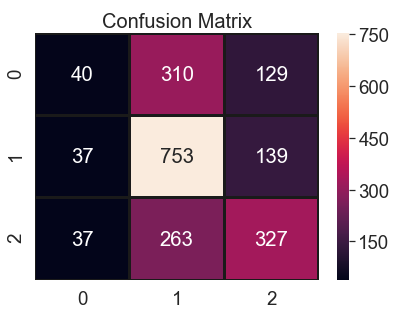

#### Business Value
I tested the model on the UEFA Champions League Matchday 6 fixtures and it accurately predicted 6 of the 8 games. 75% accuracy in its first test is acceptable, especially given the complex context of sports betting. The fixtures it incorrectly predicted were "upsets", so there will need to be some more work done to account for those situations. I will continue to tune and test the model on games this winter and update this conclusion with my findings. 

#### Class Imbalance
Going forward, I will do a second round of modeling where I address the class imbalance within the dataset. There was not a *huge* class imbalance, but I feel improvements on model accuracy could be made if they were accounted for, especially for some of the classifiers that are more sensitive to class imbalance. 

### Data Sources

FiveThirtyEight's Soccer Predictions, found [here](https://projects.fivethirtyeight.com/soccer-predictions/).  
Mohammad Ghahramani’s Match datasets, found [here](https://data.world/analystmasters/earn-your-6-figure-prize-by-soccer-betting). 
